In [1]:
import matplotlib.pyplot as plt
import numpy as np
import lmfit
from lmfit import Model

In [3]:
def G(x,x0,A0,s0):
    return A0*np.exp(-(x-x0)**2/(2.*s0**2))

In [101]:
def f(x,x1,x2,A1,A2,s1,s2):
    d=2.0
    return G(x,x1,A1,s1)+G(x,x1+d,A1,s1)+G(x,x2,A2,s2)+G(x,x2+d,A2,s2)

In [128]:
xx=np.linspace(0,10,500)
x1=2
x2=4.2
A1=2.
A2=-2
s1=0.2
s2=0.3

In [129]:
x_data=np.linspace(0,10,50)
y_true=f(x_data,x1,x2,A1,A2,s1,s2)
y_data=np.random.normal(y_true,0.2)

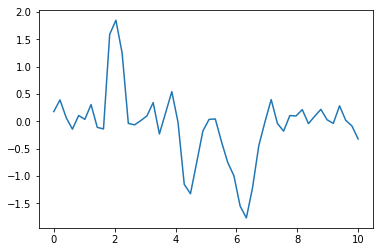

In [130]:
plt.plot(x_data,y_data)

In [131]:
four_g=Model(f)

In [132]:
pars=four_g.make_params()

In [133]:
pars['x1'].set(value=1,min=0,max=10)
pars['x2'].set(value=1,min=0,max=10)
pars['A1'].set(value=1,min=0,max=10)
pars['A2'].set(value=-1,min=-10,max=0)
pars['s1'].set(value=1,min=0,max=10)
pars['s2'].set(value=1,min=0,max=10)

In [134]:
fit=four_g.fit(x=x_data,data=y_data,params=pars,method='nelder')

In [135]:
print(fit.fit_report())

[[Model]]
    Model(f)
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 1158
    # data points      = 50
    # variables        = 6
    chi-square         = 10.5420406
    reduced chi-square = 0.23959183
    Akaike info crit   = -65.8325937
    Bayesian info crit = -54.3604557
[[Variables]]
    x1:  3.86171470 (init = 1)
    x2:  3.97646686 (init = 1)
    A1:  6.31023555 (init = 1)
    A2: -7.45003904 (init = -1)
    s1:  1.15636107 (init = 1)
    s2:  0.99606534 (init = 1)



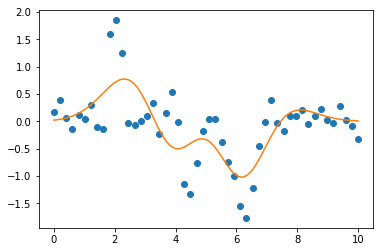

In [136]:
plt.plot(x_data,y_data,'o')
plt.plot(xx,f(xx,**fit.best_values))
#dely = fit.eval_uncertainty(x=xx,sigma=2)
#plt.fill_between(xx, f(xx,**fit.best_values)-dely, f(xx,**fit.best_values)+dely, color="#ABABAB")

In [137]:
mcfit=fit.emcee()

In [138]:
print(lmfit.fit_report(mcfit))

[[Fit Statistics]]
    # fitting method   = emcee
    # function evals   = 0
    # data points      = unknown
    # variables        = 6
    chi-square         = unknown
    reduced chi-square = unknown
    Akaike info crit   = unknown
    Bayesian info crit = unknown
[[Variables]]
    x1:  3.86234871 +/- 2.89158182 (74.87%) (init = 3.861715)
    x2:  4.24034417 +/- 1.86905225 (44.08%) (init = 3.976467)
    A1:  1.83111638 +/- 3.11943911 (170.36%) (init = 6.310236)
    A2: -2.10473064 +/- 3.42178542 (162.58%) (init = -7.450039)
    s1:  1.51932935 +/- 2.90366722 (191.12%) (init = 1.156361)
    s2:  1.33194790 +/- 1.93124954 (144.99%) (init = 0.9960653)
[[Correlations]] (unreported correlations are < 0.100)
    C(A1, A2) = -0.970
    C(x1, x2) =  0.841
    C(s1, s2) =  0.788
    C(x2, s1) =  0.237
    C(x1, s1) =  0.210
    C(A2, s1) =  0.159
    C(x2, s2) =  0.152
    C(A1, s1) = -0.146
    C(x1, s2) =  0.116


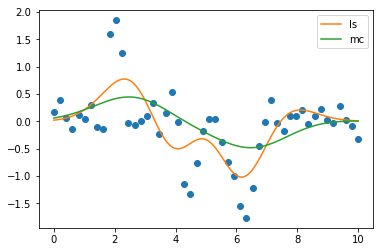

In [139]:
plt.plot(x_data,y_data,'o')
plt.plot(xx,f(xx,**fit.best_values),label='ls')
plt.plot(xx,f(xx,**mcfit.params),label='mc')
plt.legend()

In [140]:
import corner

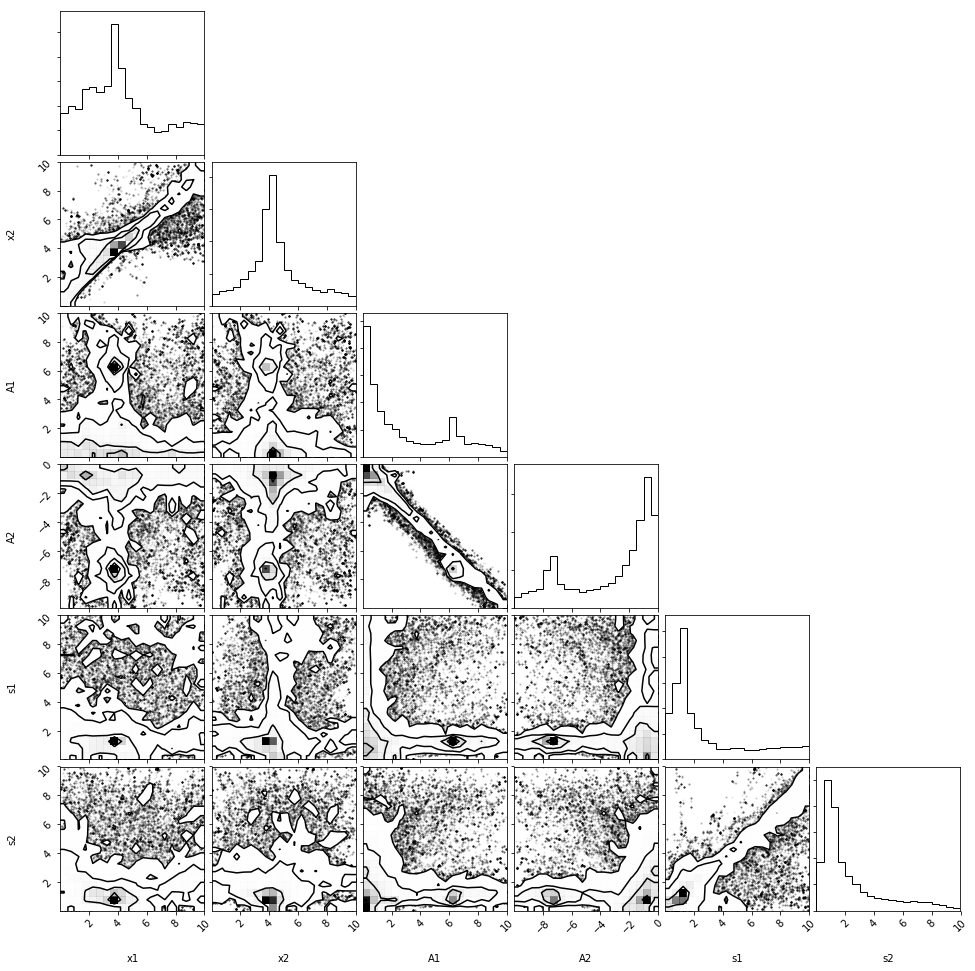

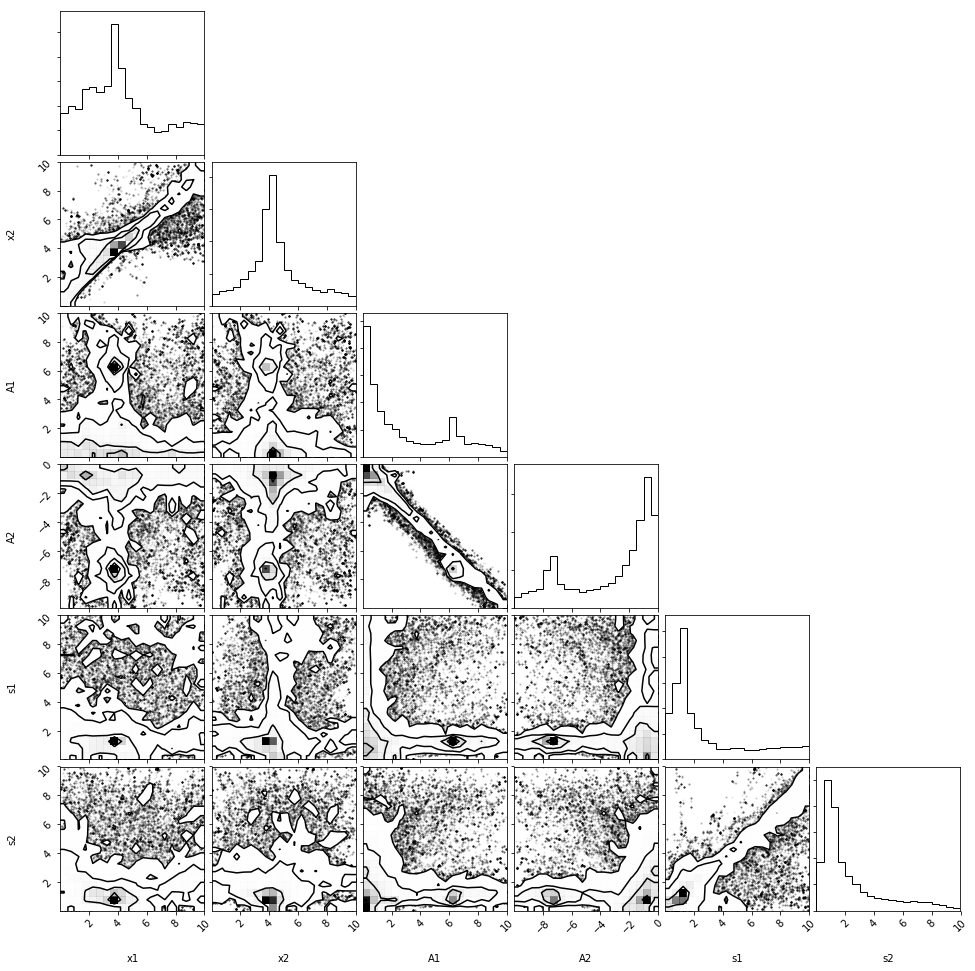

In [141]:
corner.corner(mcfit.flatchain)